In [10]:
import pandas as pd
import numpy as np

data = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium','high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent','fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes','no']
}

# Create a DataFrame
df = pd.DataFrame(data)
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31...40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [11]:
def entropy(data):
    counts = data.value_counts() / len(data)
    entropy = -np.sum(counts * np.log2(counts))
    return entropy

entropy_before_split = entropy(df['buys_computer'])

def information_gain(target, feature):
    total_entropy = entropy(target)
    values = feature.unique()
    weighted_entropy = 0
    for value in values:
        subset_indices = feature.index[feature == value]
        subset_target = target[subset_indices]
        weighted_entropy += (len(subset_target) / len(target)) * entropy(subset_target)
    return total_entropy - weighted_entropy

information_gains = {}
target = df['buys_computer']
for feature_name in df.columns[:-1]:  
    feature = df[feature_name]
    information_gains[feature_name] = information_gain(target, feature)

root_node = max(information_gains, key=information_gains.get)

print(f"Entropy (buys_computer): {entropy_before_split:.2f}")
print("Information Gains:")
for feature, ig in information_gains.items():
    print(f"{feature}: {ig:.2f}")

print(f"The first feature for the decision tree is: {root_node}")

Entropy (buys_computer): 0.94
Information Gains:
age: 0.25
income: 0.03
student: 0.15
credit_rating: 0.05
The first feature for the decision tree is: age


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=['buys_computer'])
y = df['buys_computer']

model = DecisionTreeClassifier()

model.fit(X, y)

training_accuracy = model.score(X, y)
print(f"Training Set Accuracy: {training_accuracy:.2f}")

tree_depth = model.get_depth()
print(f"Tree Depth: {tree_depth}")

Training Set Accuracy: 1.00
Tree Depth: 4


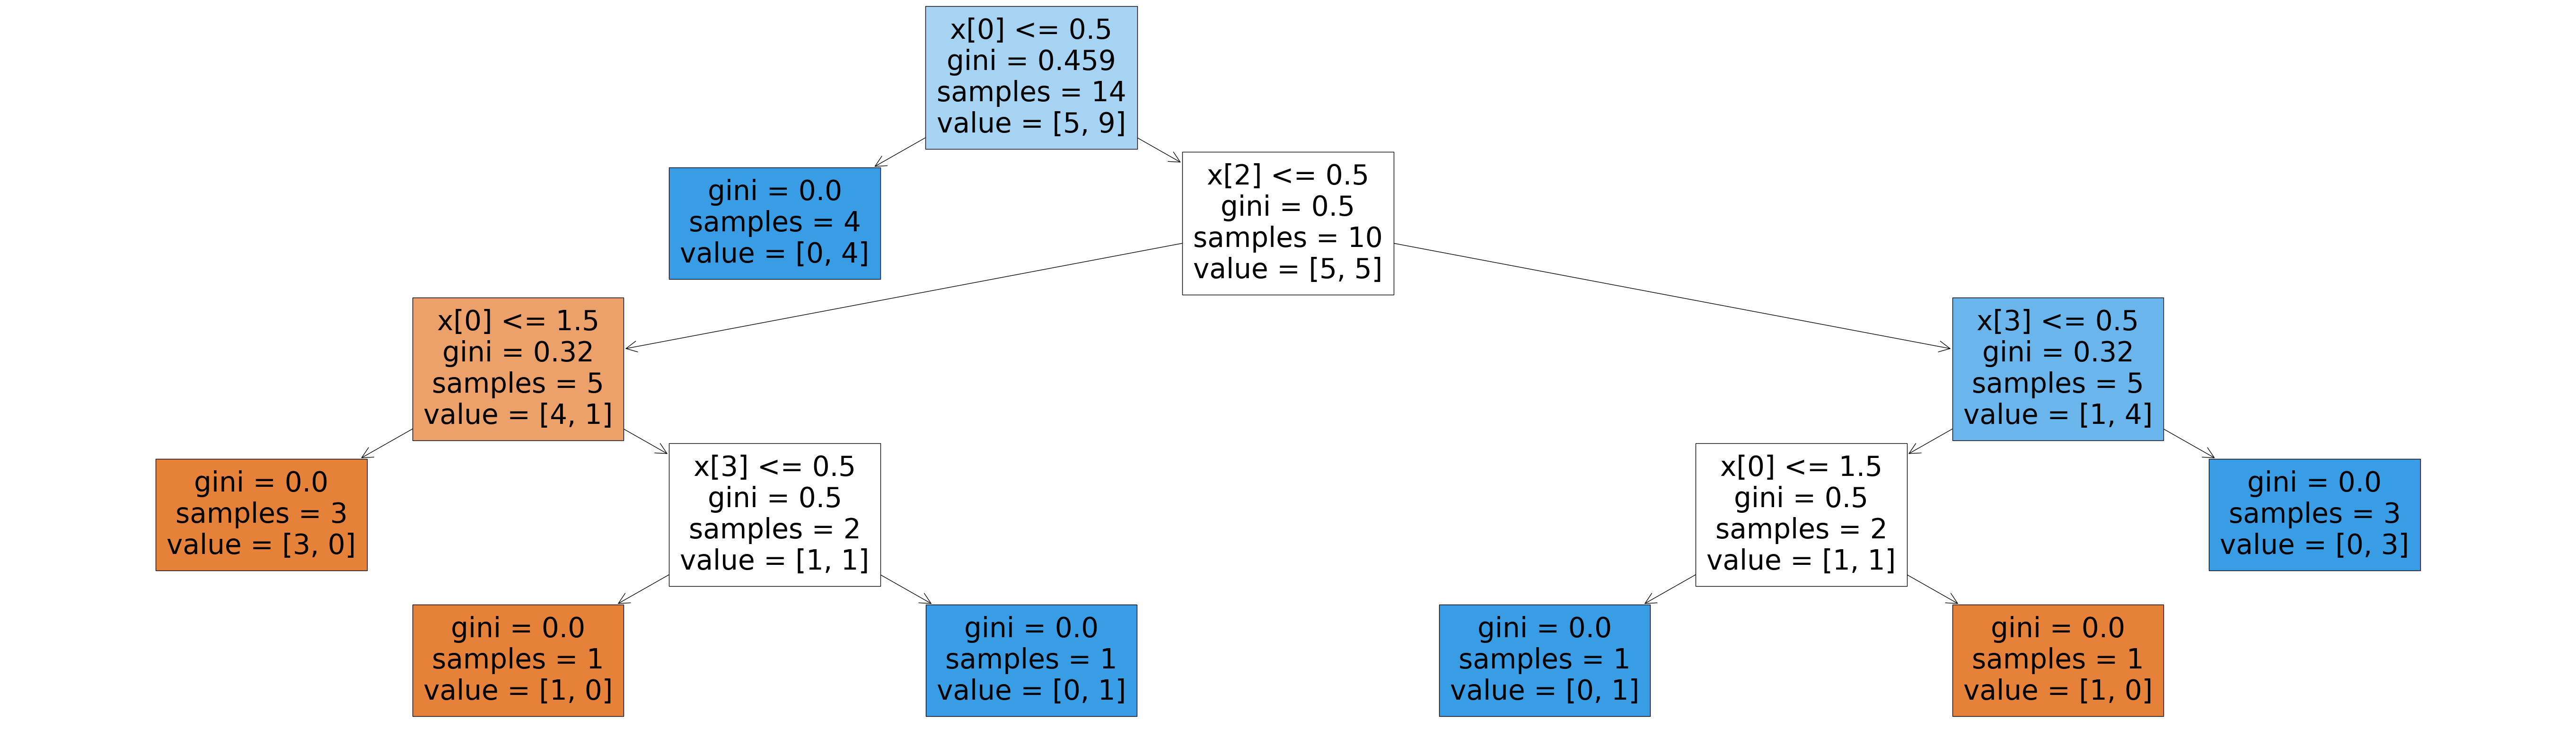

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(70, 20))
plot_tree(model, filled=True)
plt.show()

Training Set Accuracy: 1.00
Test Set Accuracy: 0.42


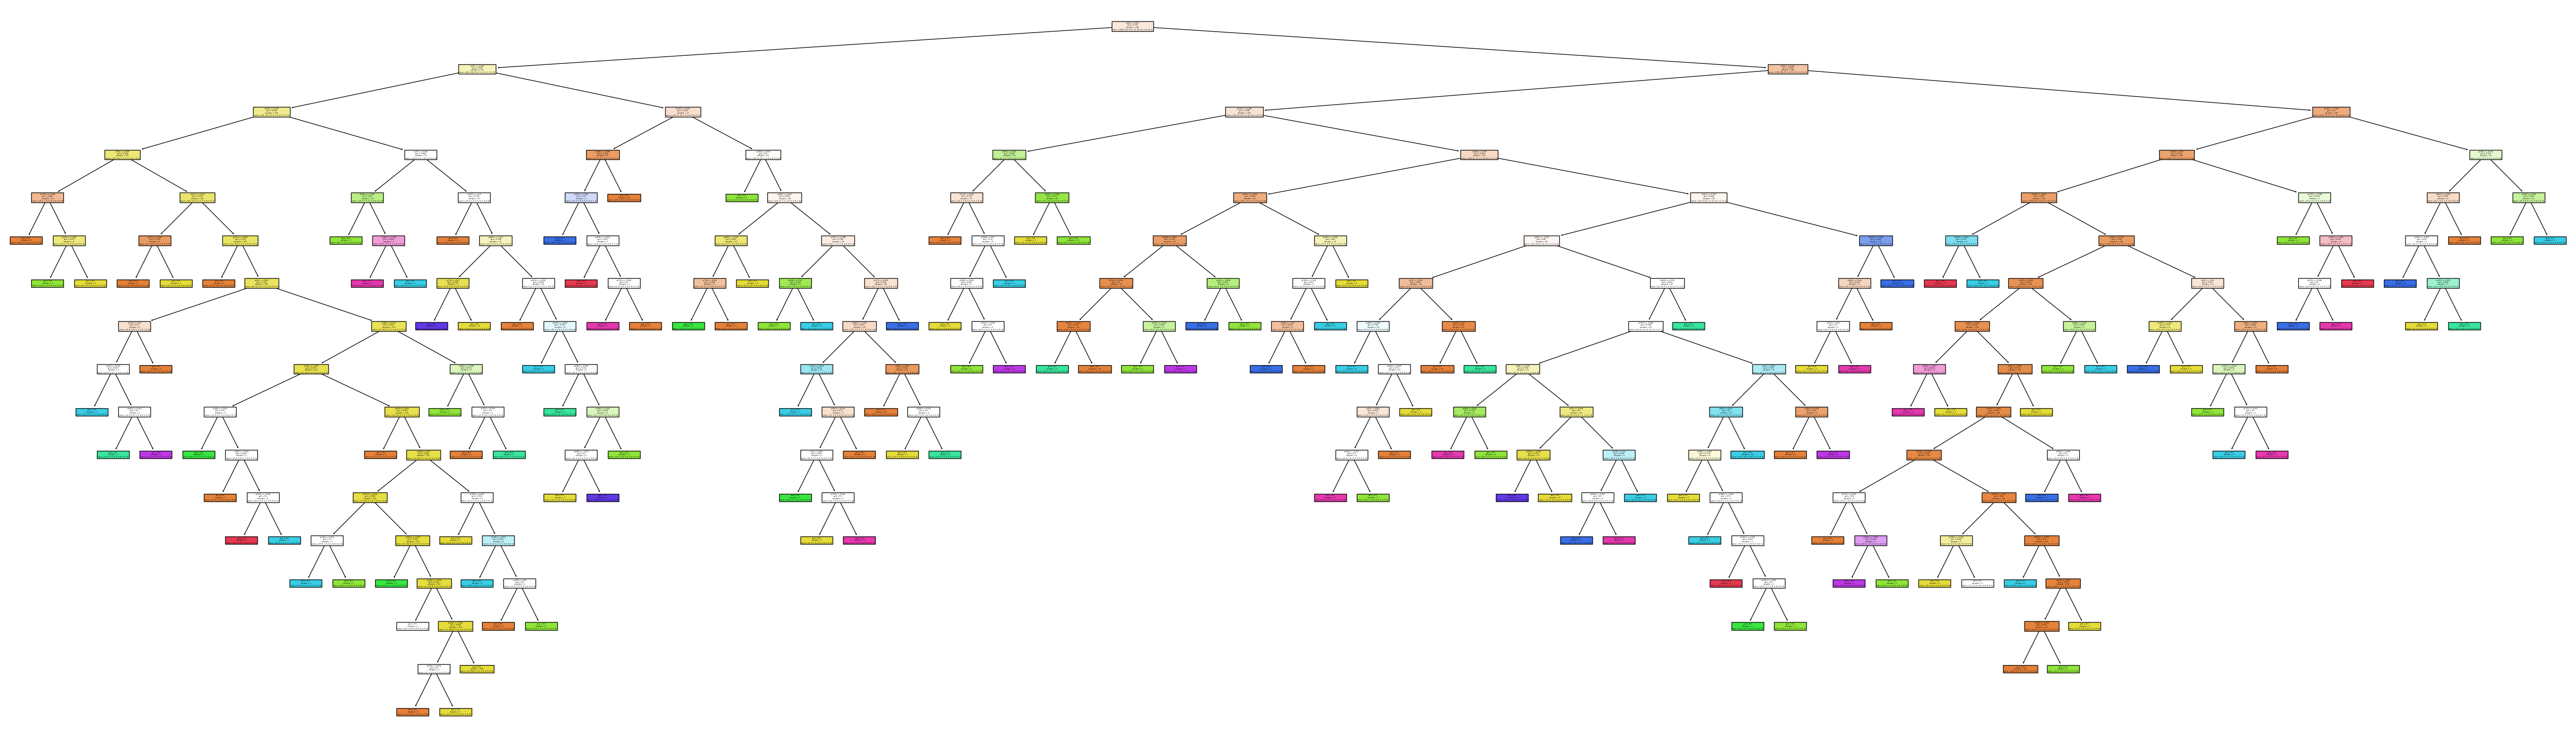

In [17]:
from sklearn.model_selection import train_test_split
data1 = pd.read_csv('final1.csv')
X = data1.iloc[:, :-1]
y = data1.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model1 = DecisionTreeClassifier()

model1.fit(X_train, y_train)

training_accuracy = model1.score(X_train, y_train)
print(f"Training Set Accuracy: {training_accuracy:.2f}")

test_accuracy = model1.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.2f}")

plt.figure(figsize=(70, 20))
plot_tree(model1, filled=True)
plt.show()

Training Set Accuracy (max_depth=5): 0.71
Test Set Accuracy (max_depth=5): 0.43


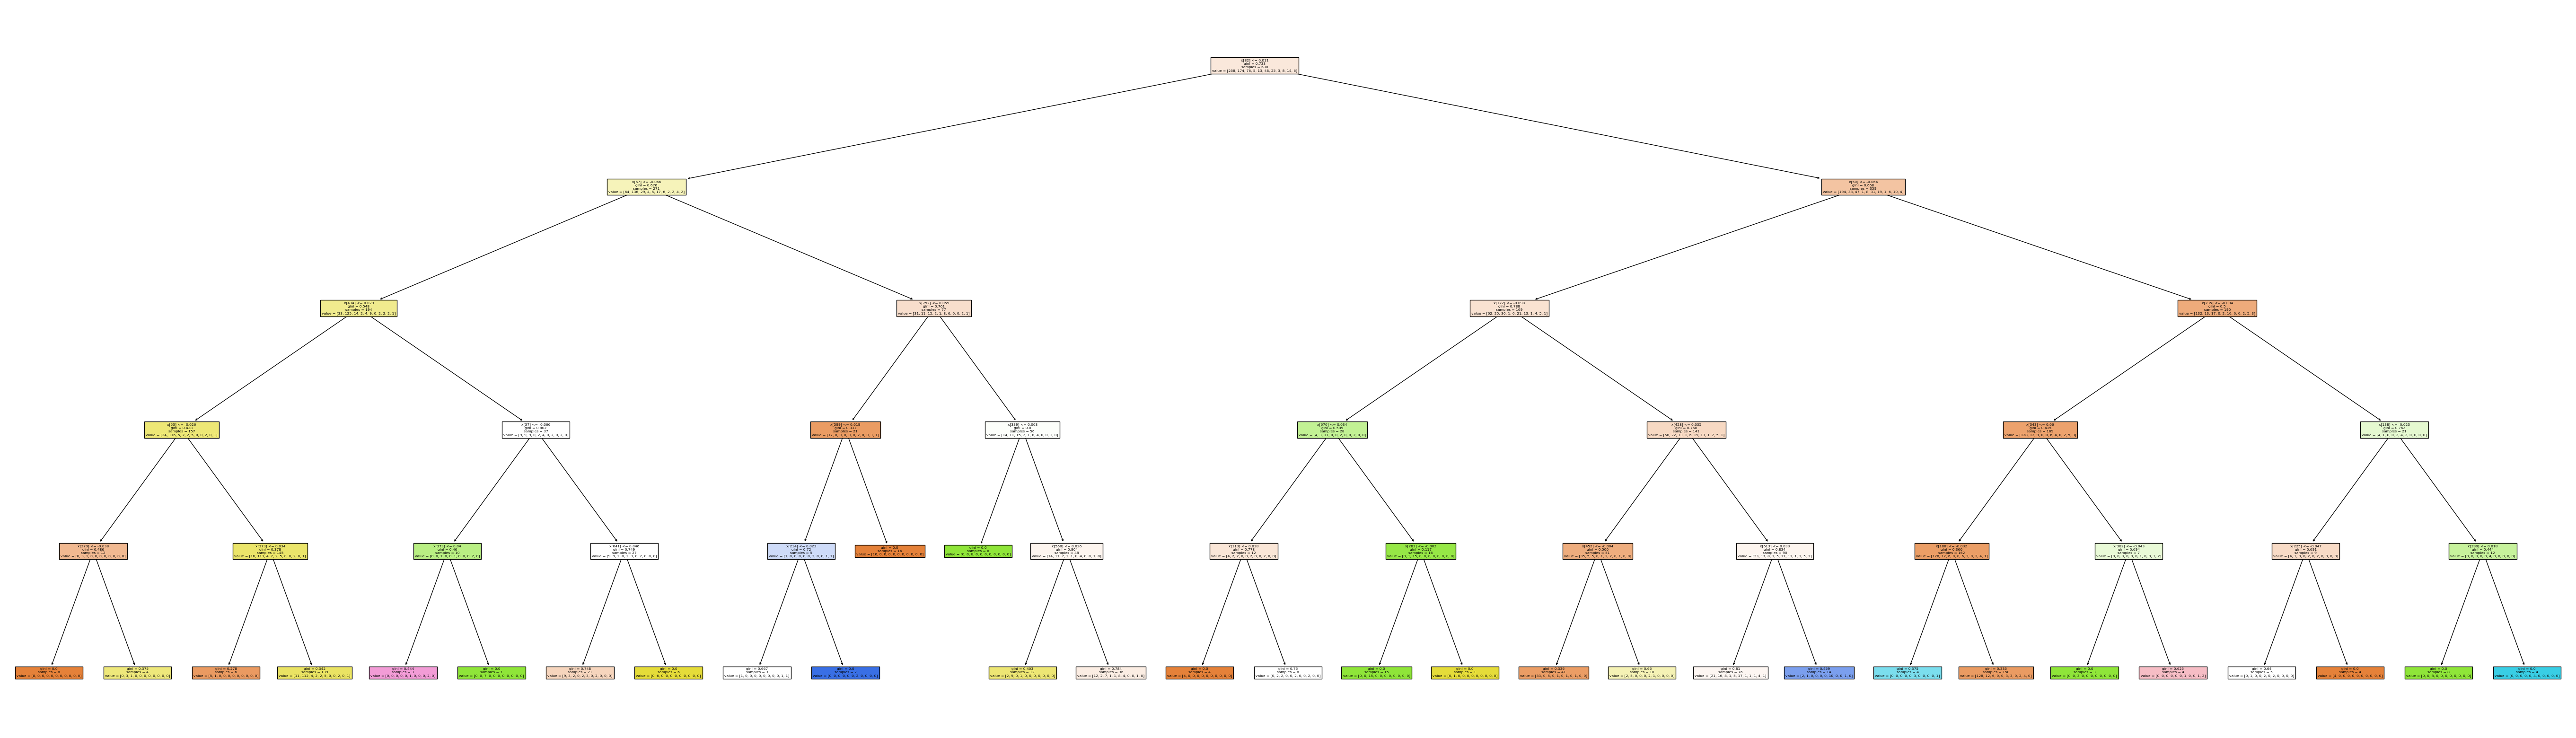

In [18]:
max_depth = 5  
model2 = DecisionTreeClassifier(max_depth=max_depth)
model2.fit(X_train, y_train)

training_accuracy = model2.score(X_train, y_train)
print(f"Training Set Accuracy (max_depth={max_depth}): {training_accuracy:.2f}")

test_accuracy = model2.score(X_test, y_test)
print(f"Test Set Accuracy (max_depth={max_depth}): {test_accuracy:.2f}")

plt.figure(figsize=(70, 20))
plot_tree(model2, filled=True)
plt.show()